# Checking in on COVID-19 in Ontario

*March 19, 2022*

There was a rumour I heard today that COVID-19 cases are on the rise again, so let's check that out while I'm having coffee this morning using PHAC's COVID-19 dataset. First we load in Pandas. I'm going to just do a very quick visualization rather than a public-facing one with Datawrapper here, and we'll use Pandas `plot()` method for that.

In [1]:
import pandas as pd

raw = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

We filter to show Ontario data, as that's what I'm most interested in now (it's where I live, after all). I'm also going to smooth the curve out so we can more clearly see the trend line towards the end. I'll do that using the VERY helpful Pandas method `pd.rolling()`.

In [10]:
ontario_cases = (raw
                 .loc[raw["prname"] == "Ontario", ["date", "numtoday", "numdeathstoday"]]
                 .set_index("date")
                 )

ontario_cases["numtoday_rolling"] = (ontario_cases["numtoday"]
                 .rolling(7).mean()
                 .dropna()
                 )

ontario_cases.to_clipboard()

Now, let's plot it very quickly so we can see the trend.

<AxesSubplot:xlabel='date'>

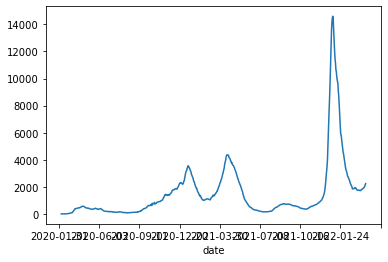

In [8]:
ontario_cases["numtoday_rolling"].plot()

It's not looking too bad, but let's just zoom in on that last peak, which starts around December 2021, to be sure.

<AxesSubplot:xlabel='date'>

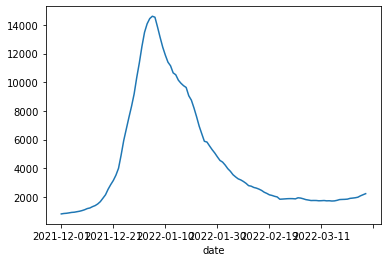

In [4]:
ontario_cases_zoomed = ontario_cases[ontario_cases.index >= "2021-12-01"]

ontario_cases_zoomed["numtoday"].plot()

Let's also peek at deaths.

<AxesSubplot:xlabel='date'>

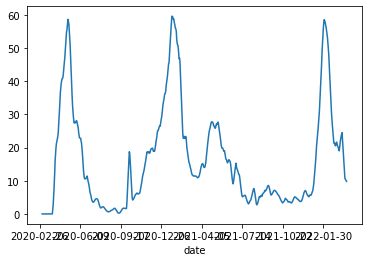

In [6]:
ontario_cases["numdeathstoday"].rolling(7).mean().plot()

\-30\-